<a href="https://colab.research.google.com/github/Amit-Padye/Scraping/blob/main/Care_Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Sample Data.xlsx')

In [ ]:
default_data=df.copy()

In [ ]:
df.head()

Period  AccountNumber  ... TotalPayableAmount Default
0  Dec-19     1000001631  ...           51591000      No
1  Dec-19     1000000227  ...           38816000     Yes
2  Dec-19     1000000832  ...          142547000     Yes
3  Dec-19     1000000187  ...          153022000      No
4  Dec-19     1000001368  ...          118425000      No

[5 rows x 19 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19012 entries, 0 to 19011
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Period                          19012 non-null  object        
 1   AccountNumber                   19012 non-null  int64         
 2   AccountType                     19012 non-null  object        
 3   BorrowerName                    19012 non-null  object        
 4   IndustryType                    19012 non-null  object        
 5   CounterpartyIndustryType        19012 non-null  object        
 6   AnyLitigation                   19012 non-null  object        
 7   LastPaymentDate                 19012 non-null  datetime64[ns]
 8   LastPaymentStatus               19012 non-null  object        
 9   LastPaymentAmountAvg            19012 non-null  int64         
 10  AccountBalanceAverage           19012 non-null  int64         
 11  Cr

In [ ]:
df.isnull().sum()

Period                            0
AccountNumber                     0
AccountType                       0
BorrowerName                      0
IndustryType                      0
CounterpartyIndustryType          0
AnyLitigation                     0
LastPaymentDate                   0
LastPaymentStatus                 0
LastPaymentAmountAvg              0
AccountBalanceAverage             0
CreditTransactionAmountAverage    0
NetRevenue                        0
CurrentRatio                      0
NoOfPastReturns                   0
ReturnAmountAverage               0
TotalReceivableAmount             0
TotalPayableAmount                0
Default                           0
dtype: int64

In [ ]:
df.describe()

AccountNumber  ...  TotalPayableAmount
count   1.901200e+04  ...        1.901200e+04
mean    1.000001e+09  ...        1.017531e+08
std     4.860191e+02  ...        3.886944e+07
min     1.000000e+09  ...        3.106100e+07
25%     1.000000e+09  ...        6.629900e+07
50%     1.000001e+09  ...        1.054840e+08
75%     1.000001e+09  ...        1.394300e+08
max     1.000002e+09  ...        1.571800e+08

[8 rows x 10 columns]

In [ ]:
duplicate = df[df.duplicated()]
duplicate

Empty DataFrame
Columns: [Period, AccountNumber, AccountType, BorrowerName, IndustryType, CounterpartyIndustryType, AnyLitigation, LastPaymentDate, LastPaymentStatus, LastPaymentAmountAvg, AccountBalanceAverage, CreditTransactionAmountAverage, NetRevenue, CurrentRatio, NoOfPastReturns, ReturnAmountAverage, TotalReceivableAmount, TotalPayableAmount, Default]
Index: []

#Let's Understand Data

In [ ]:
#function to plot repetative count plots
def count_plot(column_name):
  sns.set_style("darkgrid")
  sns.countplot(column_name,data=df)

def count_plot_with_defaulter(column_name):
  sns.set_style("darkgrid")
  sns.countplot(column_name,hue='Default',data=df, palette= ['g','r'])

# Percentage of defaulters within the categorical column
def defaulters_percentage(column_name):
      cat_perc = df[[column_name, 'Default']].groupby([column_name],as_index=False)['Default'].mean()
      cat_perc["Default"] = cat_perc["Default"]*100
      cat_perc.sort_values(by='Default', ascending=False, inplace=True)
      sns.set_style("darkgrid")
      sns.barplot( 
                    x = column_name, 
                    y='Default', 
                    order=cat_perc[column_name], 
                    data=cat_perc,
                    palette='Set2')
    

##Period

In [ ]:
df['Period'].value_counts()

Mar-19    1394
Sep-19    1325
Sep-16    1285
Dec-19    1278
Jun-19    1274
Jun-18    1253
Dec-16    1221
Jun-17    1209
Mar-16    1140
Sep-17    1131
Sep-18    1118
Dec-17    1117
Jun-16    1095
Mar-18    1094
Dec-18    1058
Mar-17    1020
Name: Period, dtype: int64

##AccountNumber

In [ ]:
df['AccountNumber'].nunique()

1601

##AccountType

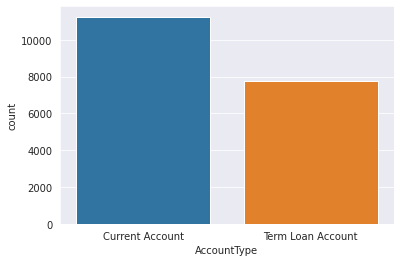

In [ ]:
count_plot(column_name='AccountType')

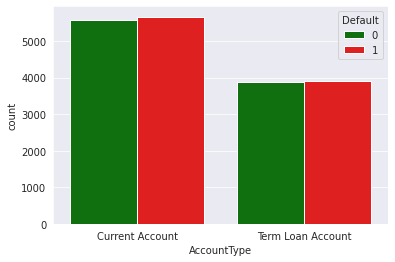

In [ ]:
count_plot_with_defaulter(column_name='AccountType')

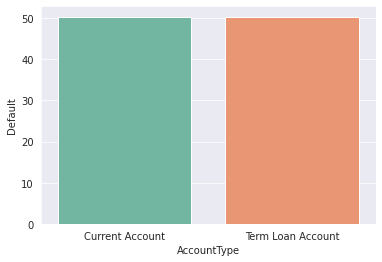

In [ ]:
defaulters_percentage('AccountType')

##BorrowerName

In [ ]:
df['BorrowerName'].nunique()

1601

##IndustryType

In [ ]:
df['IndustryType'].nunique()

10

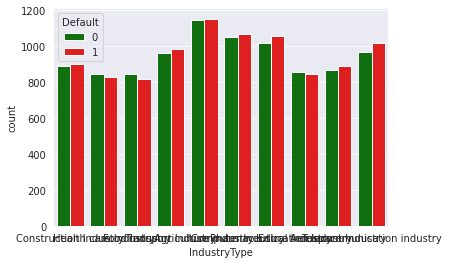

In [ ]:
count_plot_with_defaulter(column_name='IndustryType')

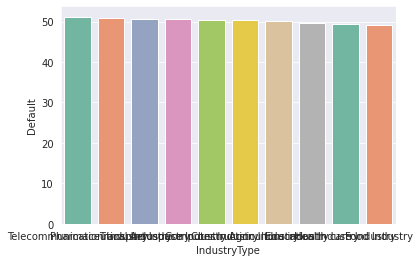

In [ ]:
defaulters_percentage(column_name='IndustryType')

##CounterpartyIndustryType

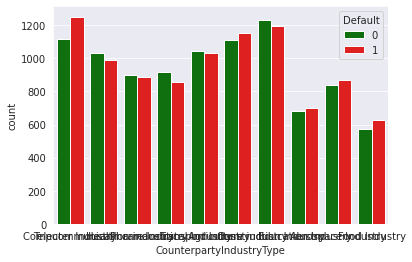

In [ ]:
count_plot_with_defaulter(column_name='CounterpartyIndustryType')

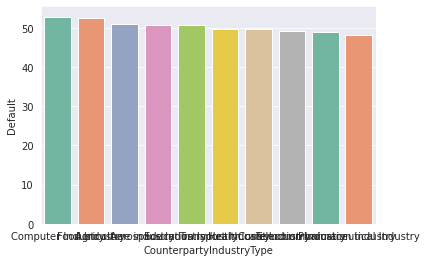

In [ ]:
defaulters_percentage(column_name='CounterpartyIndustryType')

##AnyLitigation

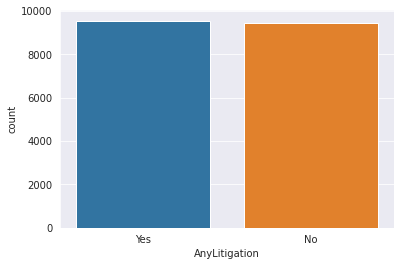

In [ ]:
count_plot('AnyLitigation')

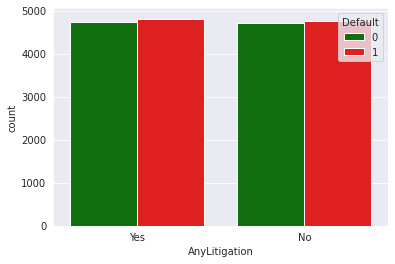

In [ ]:
count_plot_with_defaulter(column_name='AnyLitigation')

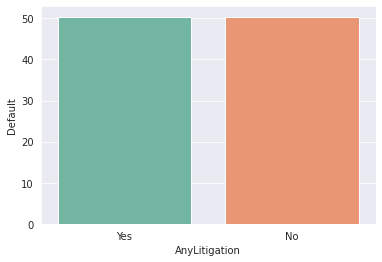

In [ ]:
defaulters_percentage(column_name='AnyLitigation')

##LastPaymentStatus

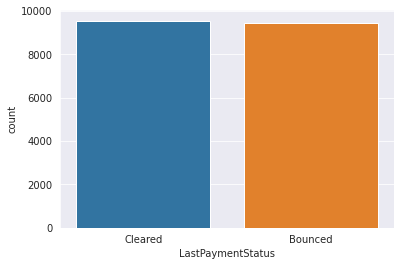

In [ ]:
count_plot('LastPaymentStatus')

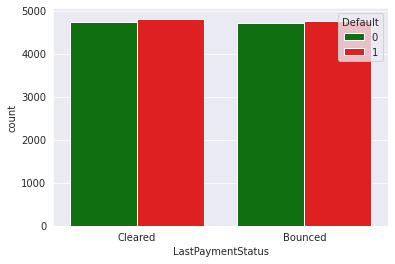

In [ ]:
count_plot_with_defaulter('LastPaymentStatus')

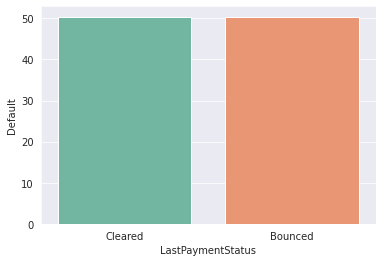

In [ ]:
defaulters_percentage(column_name='LastPaymentStatus')

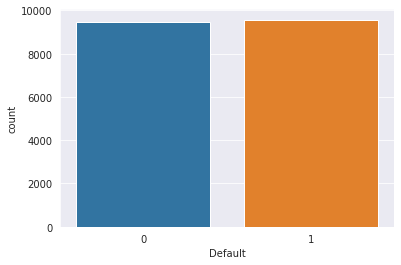

In [ ]:
count_plot('Default')

##NoOfPastReturns

In [ ]:
df['NoOfPastReturns'] = df['NoOfPastReturns'].astype(str)

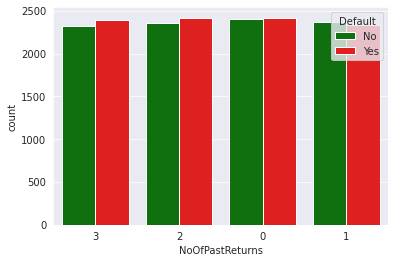

In [ ]:
count_plot_with_defaulter('NoOfPastReturns')

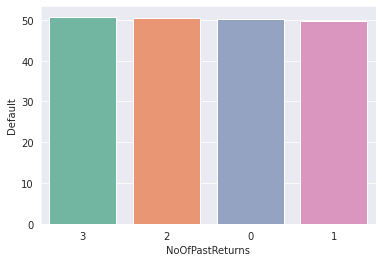

In [ ]:
defaulters_percentage(column_name='NoOfPastReturns')

##LastPaymentDate

In [ ]:
import datetime

In [ ]:
df['diffe_betn_current_and_last_payment_date']=df['LastPaymentDate'].apply(lambda x: (datetime.datetime.today()-x).days)

In [ ]:
numeric_column=df.select_dtypes(include=np.number).columns.tolist()

##Numeric Column analysis

In [ ]:
numeric_column

['AccountNumber',
 'LastPaymentAmountAvg',
 'AccountBalanceAverage',
 'CreditTransactionAmountAverage',
 'NetRevenue',
 'CurrentRatio',
 'NoOfPastReturns',
 'ReturnAmountAverage',
 'TotalReceivableAmount',
 'TotalPayableAmount',
 'Default',
 'diffe_betn_current_and_last_payment_date']

In [ ]:
def distribution_function(column_name):
  sns.kdeplot(x=column_name,
           hue='Default',
           data=df,
           palette=['g','r'],
           fill=True,)
  
def box_plot(column_name):
     sns.boxplot(x='Default',
              y=column_name,
              data=df,
               palette=['g','r']
            )

##diffe_betn_current_and_last_payment_date

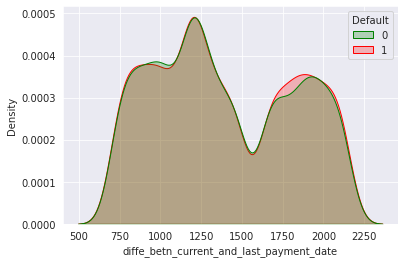

In [ ]:
distribution_function('diffe_betn_current_and_last_payment_date')

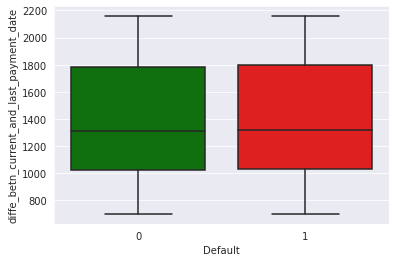

In [ ]:
box_plot(column_name='diffe_betn_current_and_last_payment_date')

##LastPaymentAmountAvg

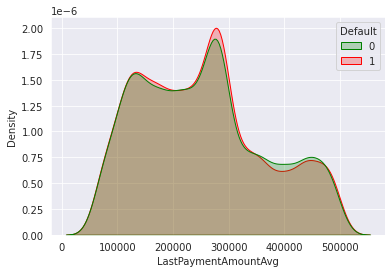

In [ ]:
distribution_function(column_name='LastPaymentAmountAvg')

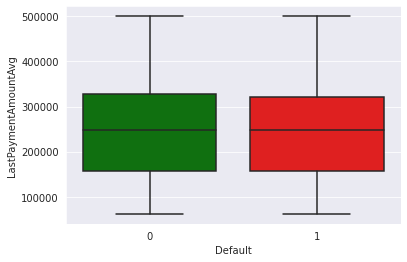

In [ ]:
box_plot(column_name='LastPaymentAmountAvg')

##AccountBalanceAverage

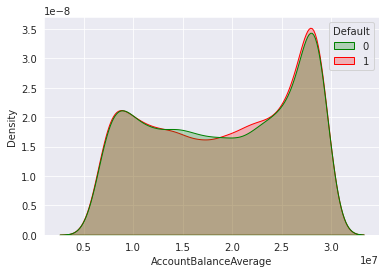

In [ ]:
distribution_function(column_name='AccountBalanceAverage')

In [ ]:
numeric_column

['AccountNumber',
 'LastPaymentAmountAvg',
 'AccountBalanceAverage',
 'CreditTransactionAmountAverage',
 'NetRevenue',
 'CurrentRatio',
 'NoOfPastReturns',
 'ReturnAmountAverage',
 'TotalReceivableAmount',
 'TotalPayableAmount',
 'Default',
 'diffe_betn_current_and_last_payment_date']

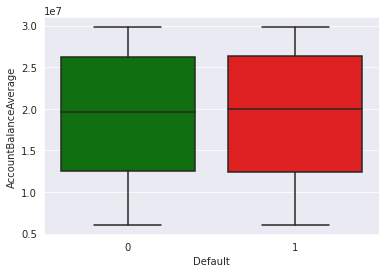

In [ ]:
box_plot(column_name='AccountBalanceAverage')

##CreditTransactionAmountAverage

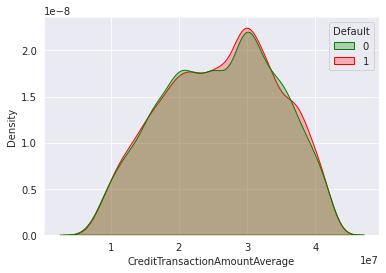

In [ ]:
distribution_function(column_name='CreditTransactionAmountAverage')

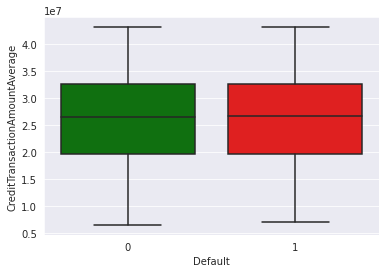

In [ ]:
box_plot(column_name='CreditTransactionAmountAverage')

##NetRevenue

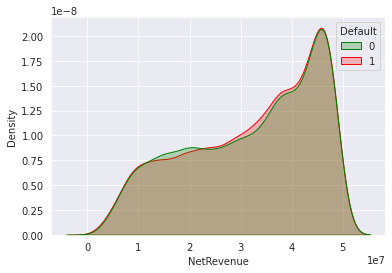

In [ ]:
distribution_function(column_name='NetRevenue')

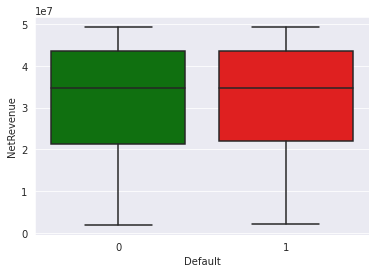

In [ ]:
box_plot(column_name='NetRevenue')

##CurrentRatio

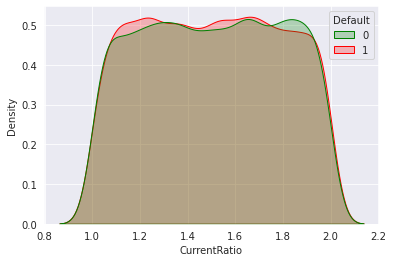

In [ ]:
distribution_function(column_name='CurrentRatio')

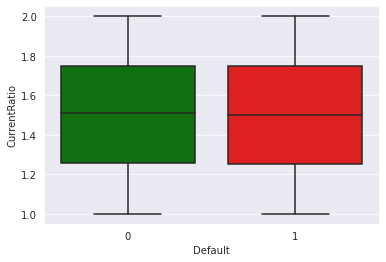

In [ ]:
box_plot(column_name='CurrentRatio')

##ReturnAmountAverage

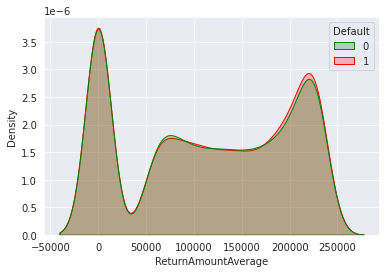

In [ ]:
distribution_function(column_name='ReturnAmountAverage')

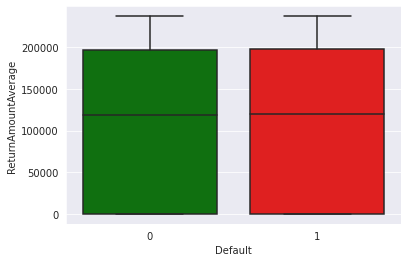

In [ ]:
box_plot(column_name='ReturnAmountAverage')

##TotalReceivableAmount

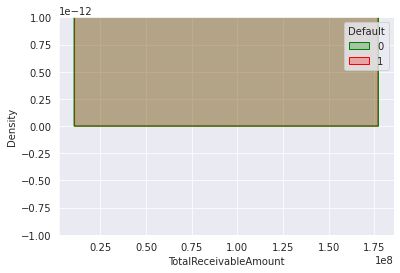

In [ ]:
distribution_function(column_name='TotalReceivableAmount')

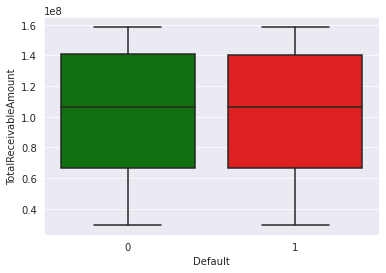

In [ ]:
box_plot(column_name='TotalReceivableAmount')

##TotalPayableAmount

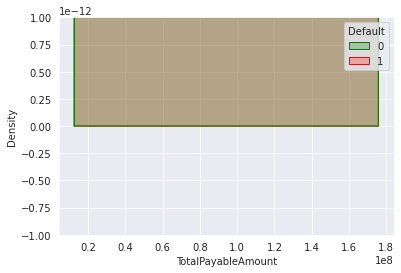

In [ ]:
distribution_function(column_name='TotalPayableAmount')

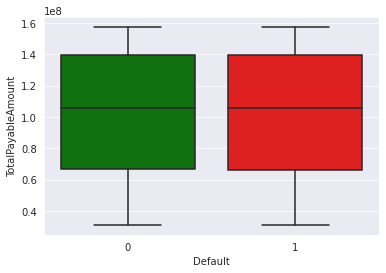

In [ ]:
box_plot(column_name='TotalPayableAmount')

In [ ]:
def period_month(period):
  month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
  month_number=list(range(1,13))
  list_=period.split('-')
  period_month=month_number[month.index(list_[0])]
  return period_month


def period_year(period):
  list_=period.split('-')
  year=2000 + int(list_[1])
  return year

In [ ]:
df['LastPaymentDate_year']=df['LastPaymentDate'].apply(lambda x:x.year)
df['LastPaymentDate_month']=df['LastPaymentDate'].apply(lambda x:x.month)
df['period_month']=df['Period'].apply(lambda x:period_month(x))
df['period_year']=df['Period'].apply(lambda x:period_year(x))
df['month_diff']=df['period_month']-df['LastPaymentDate_month']
df['year_diff']=df['period_year']-df['LastPaymentDate_year']
df['months']=df['month_diff']+12*df['year_diff']
df=df.drop(['Period','period_month','period_year','LastPaymentDate_year','LastPaymentDate_month',	'month_diff',	'year_diff','BorrowerName'],axis=1)

##Satistical Test

##Chi2 Test

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
catagory=df.select_dtypes(include=np.object).columns.tolist()

In [ ]:
catagory

['AccountType',
 'BorrowerName',
 'IndustryType',
 'CounterpartyIndustryType',
 'AnyLitigation',
 'LastPaymentStatus',
 'NoOfPastReturns',
 'Default']

In [ ]:

p_value=[]
is_significant_relationship=[]

for i in catagory:
     
    data=pd.crosstab(df[i], df['Default'], margins=True)
    stat, p, dof, expected = chi2_contingency(data)
    p_value.append(p)
    if p<=0.05:
      is_significant_relationship.append('YES')
    else:
      is_significant_relationship.append('NO')

In [ ]:
chi2_table=pd.DataFrame(list(zip(catagory,p_value,is_significant_relationship)),columns=['catagory','p_value','is_significant_relationship'])

In [ ]:
chi2_table

catagory   p_value is_significant_relationship
0               AccountType  0.999545                          NO
1              BorrowerName  1.000000                          NO
2              IndustryType  0.999998                          NO
3  CounterpartyIndustryType  0.744875                          NO
4             AnyLitigation  0.999462                          NO
5         LastPaymentStatus  0.999462                          NO
6           NoOfPastReturns  0.993030                          NO
7                   Default  0.000000                         YES

##ANOVA Test

In [ ]:
number=df.select_dtypes(include=np.number).columns.tolist()

In [ ]:
number = [num for num in number if num not in ('AccountNumber')]

In [ ]:
number

['LastPaymentAmountAvg',
 'AccountBalanceAverage',
 'CreditTransactionAmountAverage',
 'NetRevenue',
 'CurrentRatio',
 'ReturnAmountAverage',
 'TotalReceivableAmount',
 'TotalPayableAmount',
 'diffe_betn_current_and_last_payment_date',
 'months']

In [ ]:
p_value=[]
is_significant_relationship=[]
for numeric_column in number:
      #Create the Data Frame
      data=df.loc[:,['Default',numeric_column]]
      
      # f_oneway() function takes the group data as input and 
      # returns F-statistic and P-value
      from scipy.stats import f_oneway

      
      CategoryGroupLists=data.groupby('Default')[numeric_column].apply(list)
      
      # Performing the ANOVA test
      AnovaResults = f_oneway(*CategoryGroupLists)
      
      p_value.append(AnovaResults[1])
      if AnovaResults[1]<=0.05:
       
         is_significant_relationship.append('YES')
      else:
        is_significant_relationship.append('NO')


In [ ]:
anova_table=pd.DataFrame(list(zip(number,p_value,is_significant_relationship)),columns=['catagory','p_value','is_significant_relationship'])

In [ ]:
anova_table

catagory  ...  is_significant_relationship
0                      LastPaymentAmountAvg  ...                           NO
1                     AccountBalanceAverage  ...                           NO
2            CreditTransactionAmountAverage  ...                           NO
3                                NetRevenue  ...                           NO
4                              CurrentRatio  ...                           NO
5                       ReturnAmountAverage  ...                           NO
6                     TotalReceivableAmount  ...                           NO
7                        TotalPayableAmount  ...                           NO
8  diffe_betn_current_and_last_payment_date  ...                           NO
9                                    months  ...                           NO

[10 rows x 3 columns]

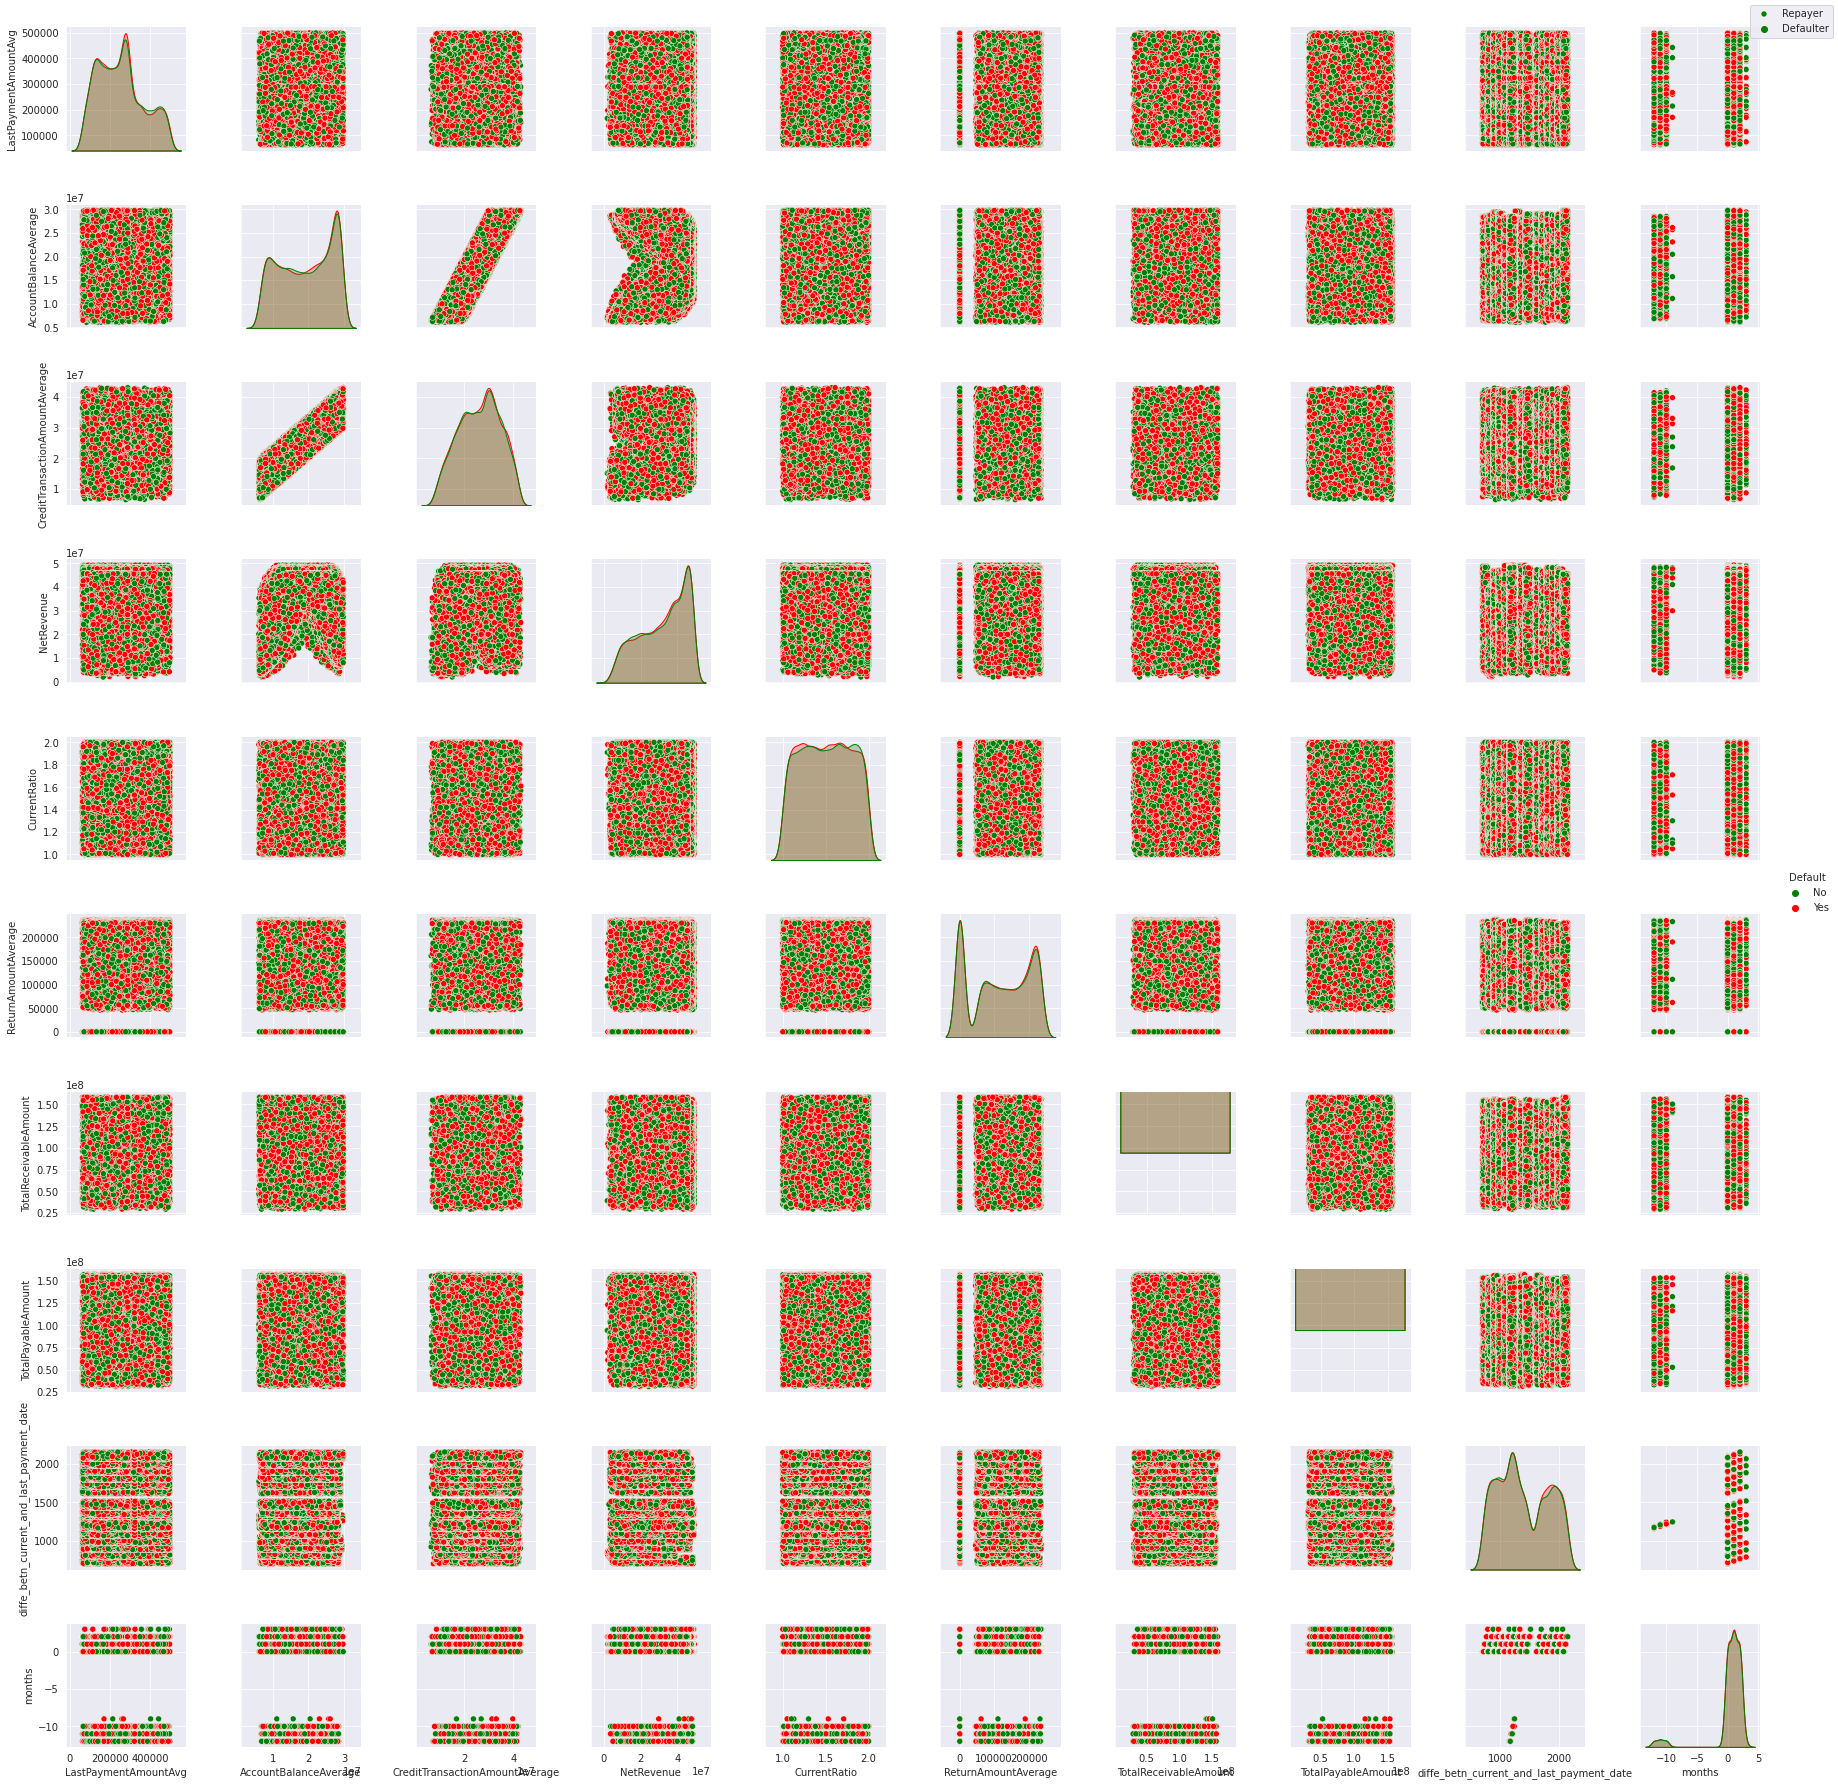

In [ ]:
amount = df[number+['Default']]

ax= sns.pairplot(amount,hue="Default",palette=["g","r"])
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19012 entries, 0 to 19011
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   AccountNumber                             19012 non-null  int64         
 1   AccountType                               19012 non-null  object        
 2   BorrowerName                              19012 non-null  object        
 3   IndustryType                              19012 non-null  object        
 4   CounterpartyIndustryType                  19012 non-null  object        
 5   AnyLitigation                             19012 non-null  object        
 6   LastPaymentDate                           19012 non-null  datetime64[ns]
 7   LastPaymentStatus                         19012 non-null  object        
 8   LastPaymentAmountAvg                      19012 non-null  int64         
 9   AccountBalanceAverage       

In [ ]:
df['NoOfPastReturns'] = df['NoOfPastReturns'].astype(int)

In [ ]:
df.drop(['LastPaymentDate','BorrowerName'],axis=1,inplace=True)

In [ ]:
df['Default']=df['Default'].apply(lambda x: 1 if x=='Yes' else 0)

In [ ]:
catagory=df.select_dtypes(include=np.object).columns.tolist()

In [ ]:
catagory

['AccountType',
 'IndustryType',
 'CounterpartyIndustryType',
 'AnyLitigation',
 'LastPaymentStatus']

In [ ]:

for col in catagory:
   a= df[col]
   label=pd.get_dummies(a,prefix=col,drop_first=True)
   df=pd.concat([df,label],axis=1)

In [ ]:
df.drop(catagory,axis=1,inplace=True)


In [ ]:
df.head()

AccountNumber  ...  LastPaymentStatus_Cleared
0     1000001631  ...                          1
1     1000000227  ...                          0
2     1000000832  ...                          0
3     1000000187  ...                          1
4     1000001368  ...                          1

[5 rows x 36 columns]

##ML Algorithms

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.model_selection import GridSearchCV
price_classifier = DecisionTreeClassifier(criterion='gini')
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report



In [ ]:
df=df.sort_values('AccountNumber')

In [ ]:
df.head(30)

AccountNumber  ...  LastPaymentStatus_Cleared
10825     1000000001  ...                          0
17808     1000000001  ...                          1
1031      1000000001  ...                          0
4908      1000000001  ...                          1
12577     1000000001  ...                          1
14216     1000000001  ...                          1
2309      1000000001  ...                          0
9731      1000000001  ...                          1
3634      1000000001  ...                          1
8478      1000000001  ...                          1
7360      1000000001  ...                          0
11942     1000000001  ...                          0
15302     1000000001  ...                          1
16523     1000000001  ...                          0
18903     1000000001  ...                          0
6302      1000000001  ...                          1
16625     1000000002  ...                          0
5010      1000000002  ...                          0
17493     1000000003  ...                          0
10510     1000000003  ...                          1
18588     1000000003  ...                          0
14987     1000000003  ...                          0
7045      1000000003  ...                          1
5987      1000000003  ...                          0
11627     1000000003  ...                          0
716       1000000003  ...                          1
12262     1000000003  ...                          1
16208     1000000003  ...                          1
13901     1000000003  ...                          0
1994      1000000003  ...                          0

[30 rows x 36 columns]

In [ ]:
account_numbers=list(df['AccountNumber'].unique())
account_numbers.sort()
print(account_numbers)

[1000000001, 1000000002, 1000000003, 1000000004, 1000000005, 1000000006, 1000000007, 1000000008, 1000000009, 1000000010, 1000000011, 1000000012, 1000000013, 1000000014, 1000000015, 1000000016, 1000000017, 1000000018, 1000000019, 1000000020, 1000000021, 1000000022, 1000000023, 1000000024, 1000000025, 1000000026, 1000000027, 1000000028, 1000000029, 1000000031, 1000000033, 1000000034, 1000000035, 1000000036, 1000000038, 1000000039, 1000000040, 1000000041, 1000000042, 1000000043, 1000000044, 1000000045, 1000000046, 1000000047, 1000000048, 1000000049, 1000000050, 1000000051, 1000000052, 1000000053, 1000000054, 1000000055, 1000000056, 1000000057, 1000000058, 1000000059, 1000000061, 1000000062, 1000000063, 1000000064, 1000000065, 1000000066, 1000000067, 1000000068, 1000000069, 1000000070, 1000000071, 1000000072, 1000000073, 1000000074, 1000000075, 1000000076, 1000000077, 1000000078, 1000000080, 1000000081, 1000000082, 1000000083, 1000000084, 1000000085, 1000000086, 1000000087, 1000000088, 100

In [ ]:
train_account_number=account_numbers[:int(1601*0.70)]

test_account_number=account_numbers[int(1601*0.70):]

In [ ]:
len(train_account_number),len(test_account_number)

(1120, 481)

In [ ]:
df.set_index('AccountNumber', inplace=True)

In [ ]:
train_df=df.loc[train_account_number,:]

test_df=df.loc[test_account_number,:]


In [ ]:
def dependendent_and_independent(data):
  data.reset_index(drop=True, inplace=True)
  x=data.drop('Default',axis=1)
  
  y=data['Default']
  return x,y


In [ ]:
x_train,y_train=dependendent_and_independent(train_df)

x_test,y_test=dependendent_and_independent(test_df)

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
grid_values = {'n_estimators':[50, 100, 150, 200], 'max_depth':[7, 9, 11, 13], "max_leaf_nodes": [35, 40, 45, 50]}
classifier = RandomForestClassifier(random_state=0)
classifier = GridSearchCV(classifier, param_grid= grid_values, scoring = 'accuracy', cv=5)
classifier.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [7, 9, 11, 13],
                         'max_leaf_nodes': [35, 40, 45, 50],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [ ]:
classifier.best_params_

{'max_depth': 9, 'max_leaf_nodes': 45, 'n_estimators': 200}

In [ ]:
classifier = RandomForestClassifier(max_depth= 9, n_estimators= 290, max_leaf_nodes = 45, random_state=0, class_weight='balanced')
classifier.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, max_leaf_nodes=45,
                       n_estimators=290, random_state=0)

In [ ]:
y_test_prediction = classifier.predict(x_test)
y_train_prediction = classifier.predict(x_train)



In [ ]:
reportRf = classification_report(y_test, y_test_prediction, output_dict = True)
crLReg = pd.DataFrame(reportRf).transpose()
crLReg

precision    recall  f1-score      support
0              0.485470  0.506962  0.495983  2801.000000
1              0.500904  0.479419  0.489926  2891.000000
accuracy       0.492973  0.492973  0.492973     0.492973
macro avg      0.493187  0.493190  0.492955  5692.000000
weighted avg   0.493309  0.492973  0.492907  5692.000000

In [ ]:
reportRf = classification_report(y_train, y_train_prediction, output_dict = True)
crLReg = pd.DataFrame(reportRf).transpose()
crLReg

precision    recall  f1-score       support
0              0.725963  0.765378  0.745150   6649.000000
1              0.752773  0.712037  0.731839   6671.000000
accuracy       0.738664  0.738664  0.738664      0.738664
macro avg      0.739368  0.738708  0.738494  13320.000000
weighted avg   0.739390  0.738664  0.738483  13320.000000

In [ ]:
features = x_train.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

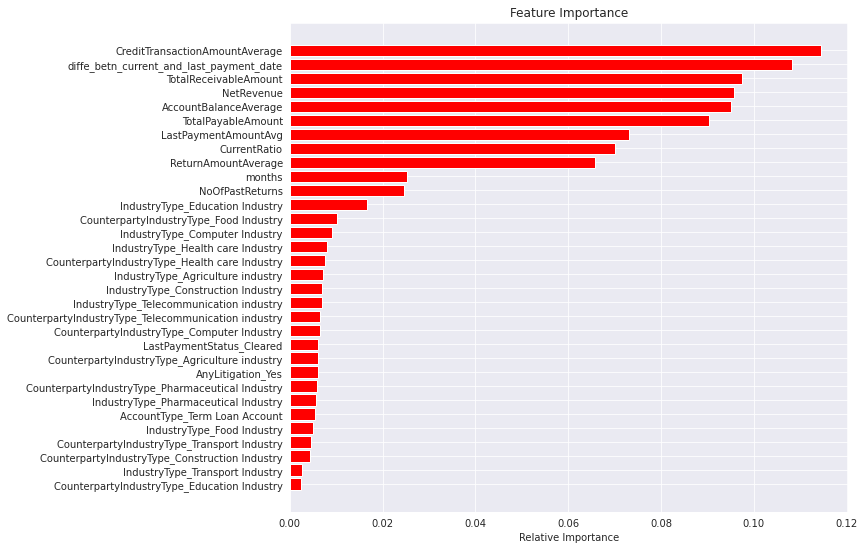

In [ ]:
fig = plt.figure(figsize=(10,9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
['TotalReceivableAmount','TotalPayableAmount',
 'NetRevenue','CreditTransactionAmountAverage',
 'LastPaymentAmountAvg', 'AccountBalanceAverage',
 'diffe_betn_current_and_last_payment_date','CurrentRatio','ReturnAmountAverage']

In [ ]:
df.columns

In [ ]:
df.columns

<Figure size 2160x1080 with 0 Axes>

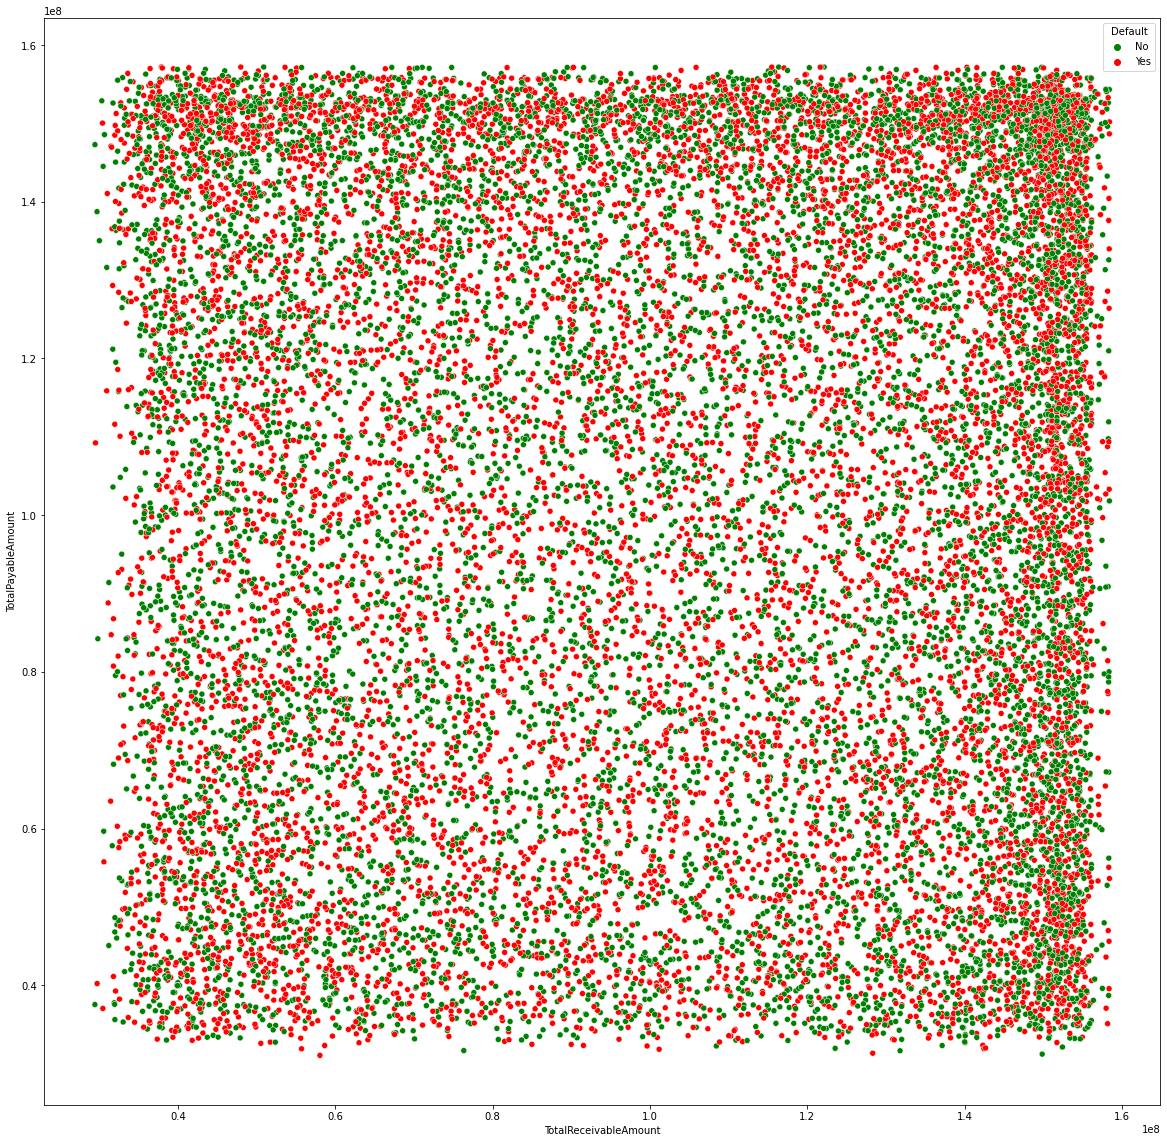

In [ ]:
fig = plt.figure(figsize=(30,15))


plt.figure(figsize=(20, 20))
sns.scatterplot(df['TotalReceivableAmount'],df['TotalPayableAmount'] ,hue=df['Default'],palette=["g","r"])
plt.show()

##KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

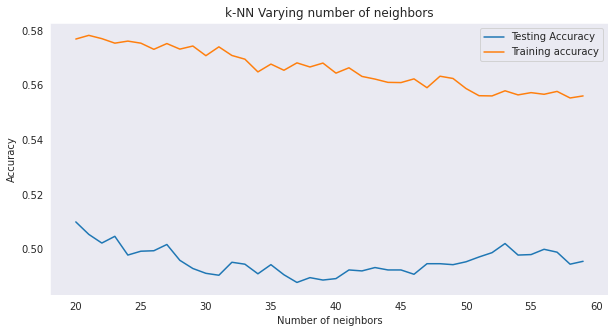

In [ ]:
neighbors = np.arange(20,60)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn_clf = KNeighborsClassifier(n_neighbors = k)
    knn_clf.fit(x_train, y_train)
    train_accuracy[i] = knn_clf.score(x_train, y_train)
    test_accuracy[i] = knn_clf.score(x_test, y_test) 

plt.figure(figsize= (10,5))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors = 50)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [ ]:
y_test_prediction = knn_clf.predict(x_test)
y_train_prediction = knn_clf.predict(x_train)

In [ ]:
x_train

In [ ]:
reportKnn = classification_report(y_test, y_test_prediction, output_dict = True)
crLReg = pd.DataFrame(reportKnn).transpose()
crLReg

precision    recall  f1-score      support
0              0.488805  0.553374  0.519089  2801.000000
1              0.503768  0.439294  0.469327  2891.000000
accuracy       0.495432  0.495432  0.495432     0.495432
macro avg      0.496287  0.496334  0.494208  5692.000000
weighted avg   0.496405  0.495432  0.493815  5692.000000

In [ ]:
reportKnn = classification_report(y_train, y_train_prediction, output_dict = True)
crLReg = pd.DataFrame(reportKnn).transpose()
crLReg

precision    recall  f1-score       support
0              0.551180  0.625207  0.585864   6649.000000
1              0.568709  0.492580  0.527914   6671.000000
accuracy       0.558784  0.558784  0.558784      0.558784
macro avg      0.559944  0.558893  0.556889  13320.000000
weighted avg   0.559959  0.558784  0.556841  13320.000000

In [ ]:
final_feature=['TotalReceivableAmount','TotalPayableAmount',
 'NetRevenue','CreditTransactionAmountAverage',
 'LastPaymentAmountAvg', 'AccountBalanceAverage',
 'diffe_betn_current_and_last_payment_date','CurrentRatio','ReturnAmountAverage']

In [ ]:
x_train_best_features=x_train[final_feature]
x_test_best_feature=x_test[final_feature]

In [ ]:
new_df=df[final_feature+['Default']]

In [ ]:
new_df

In [ ]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train_best_features)
x_test=scalar.transform(x_test_best_feature)

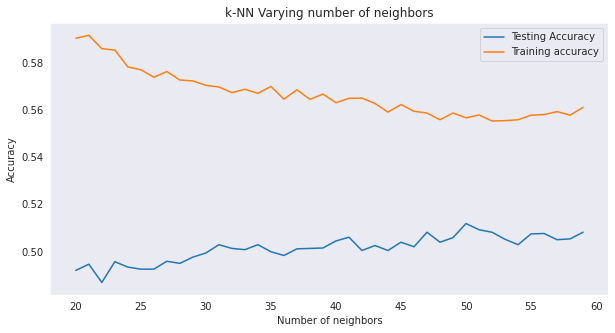

In [ ]:
neighbors = np.arange(20,60)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn_clf = KNeighborsClassifier(n_neighbors = k)
    knn_clf.fit(x_train, y_train)
    train_accuracy[i] = knn_clf.score(x_train, y_train)
    test_accuracy[i] = knn_clf.score(x_test, y_test) 

plt.figure(figsize= (10,5))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors = 50)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [ ]:
y_test_prediction = knn_clf.predict(x_test)
y_train_prediction = knn_clf.predict(x_train)

In [ ]:
reportKnn = classification_report(y_test, y_test_prediction, output_dict = True)
crLReg = pd.DataFrame(reportKnn).transpose()
crLReg

precision    recall  f1-score      support
0              0.503414  0.579079  0.538602  2801.000000
1              0.522672  0.446558  0.481627  2891.000000
accuracy       0.511771  0.511771  0.511771     0.511771
macro avg      0.513043  0.512819  0.510114  5692.000000
weighted avg   0.513195  0.511771  0.509664  5692.000000

In [ ]:
reportKnn = classification_report(y_train, y_train_prediction, output_dict = True)
crLReg = pd.DataFrame(reportKnn).transpose()
crLReg

precision    recall  f1-score       support
0              0.549519  0.619191  0.582278   6649.000000
1              0.565546  0.494079  0.527402   6671.000000
accuracy       0.556532  0.556532  0.556532      0.556532
macro avg      0.557533  0.556635  0.554840  13320.000000
weighted avg   0.557546  0.556532  0.554795  13320.000000

##XGBClassifier 

In [ ]:
x_train_best_features

TotalReceivableAmount  ...  ReturnAmountAverage
0                  121032000  ...                57000
1                   76143000  ...                    0
2                   95721000  ...               223000
3                  152369000  ...                82000
4                   52694000  ...               154000
...                      ...  ...                  ...
13315               53159000  ...                    0
13316               90703000  ...                    0
13317               60084000  ...                    0
13318              152107000  ...               129000
13319              136393000  ...               217000

[13320 rows x 9 columns]

In [ ]:
x_test_best_feature

TotalReceivableAmount  ...  ReturnAmountAverage
0                 155566000  ...                54000
1                  56341000  ...                82000
2                  69254000  ...               165000
3                 108615000  ...               103000
4                 153767000  ...                    0
...                     ...  ...                  ...
5687              139194000  ...               154000
5688              154006000  ...               234000
5689              150721000  ...               222000
5690              152699000  ...               192000
5691              115280000  ...                    0

[5692 rows x 9 columns]

In [ ]:
from xgboost import XGBClassifier 
xgb_model = XGBClassifier()

In [ ]:
param={
    'learning_rate':[0.01, 0.25, 0.5, 0.10],
    'max_depth':[3,6,9],
    'n_estimators':[25,75,150,200],
    'min_child_weight':[1,2,3,4]
}
grid_search = GridSearchCV(xgb_model, param,cv=5)
grid_search.fit(x_train_best_features,y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.01, 0.25, 0.5, 0.1],
                         'max_depth': [3, 6, 9],
                         'min_child_weight': [1, 2, 3, 4],
                         'n_estimators': [25, 75, 150, 200]})

In [ ]:
grid_search.best_params_

{'learning_rate': 0.25,
 'max_depth': 6,
 'min_child_weight': 4,
 'n_estimators': 150}

{'learning_rate': 0.25,
 'max_depth': 6,
 'min_child_weight': 4,
 'n_estimators': 150}

In [ ]:
xgb_model=XGBClassifier(learning_rate= 0.25,
 max_depth = 6,
 min_child_weight = 4,
 n_estimators = 150)
xgb_model.fit(x_train_best_features, y_train)

XGBClassifier(learning_rate=0.25, max_depth=6, min_child_weight=4,
              n_estimators=150)

In [ ]:
y_test_prediction = xgb_model.predict(x_test_best_feature)
y_train_prediction = xgb_model.predict(x_train_best_features)

In [ ]:
reportxgb = classification_report(y_test, y_test_prediction, output_dict = True)
crLReg = pd.DataFrame(reportxgb).transpose()
crLReg

precision    recall  f1-score    support
0              0.498568  0.497322  0.497945  2801.0000
1              0.514148  0.515393  0.514769  2891.0000
accuracy       0.506500  0.506500  0.506500     0.5065
macro avg      0.506358  0.506357  0.506357  5692.0000
weighted avg   0.506481  0.506500  0.506490  5692.0000